<a href="https://colab.research.google.com/github/HaydenLee0927/Baseball-Experiments/blob/main/GGBia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NeilPaine538/MLB-WAR-data-historical

Cloning into 'MLB-WAR-data-historical'...
remote: Enumerating objects: 745, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 745 (delta 126), reused 213 (delta 123), pack-reused 529
Receiving objects: 100% (745/745), 115.98 MiB | 26.39 MiB/s, done.
Resolving deltas: 100% (419/419), done.


In [ ]:
!git clone https://github.com/Haydenlee2024/ggdata

Cloning into 'ggdata'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
import pandas as pd

In [ ]:
awards= pd.read_csv('/content/ggdata/AwardsPlayers.csv')
awards = awards[awards['awardID'] == 'Gold Glove'].reset_index(drop = True)
awards = awards.set_index('playerID', drop = True)
awards = awards.set_index([awards.index, 'yearID'])
awards.index

MultiIndex([('hodgegi01', 1957),
            (  'foxne01', 1957),
            ('malzofr01', 1957),
            ('lollash01', 1957),
            ( 'mayswi01', 1957),
            ('minosmi01', 1957),
            ('shantbo01', 1957),
            ('kalinal01', 1957),
            ('mcmilro01', 1957),
            ('powervi01', 1958),
            ...
            ('keuchda01', 2021),
            ('stallja01', 2021),
            ('goldspa01', 2021),
            ('edmanto01', 2021),
            ('arenano01', 2021),
            ('crawfbr01', 2021),
            ('oneilty01', 2021),
            ('duvalad01', 2021),
            ('baderha01', 2021),
            ('friedma01', 2021)],
           names=['playerID', 'yearID'], length=1164)

In [ ]:
batting = pd.read_csv('/content/ggdata/Batting.csv')
"""
a=[]
for i in batting.index:
  if batting.loc[i]['playerID'] not in list(awards['playerID']):
    a.append(i)
  elif batting.loc[i]['yearID'] not in list(awards[awards['playerID'] == batting.loc[i]['playerID']]['yearID']):
    a.append(i)

  elif list(awards[awards['yearID'] == batting.loc[i]['yearID']][awards['playerID'] == batting.loc[i]['playerID']]['notes'])[0] == 'P':
    a.append(i)
batting = batting.drop(a)
batting = batting.drop([i for i in batting.index if batting.loc[i]['yearID'] == 2020])
batting = batting.drop(['stint','teamID','lgID'], axis = 1)
batting = batting.reset_index(drop=True)
"""
batting = batting.drop([i for i in batting.index if batting.loc[i]['yearID'] == 2020])
batting = batting.drop(['stint','teamID','lgID'], axis = 1)
batting = batting[batting['yearID'] >= 1957]
batting = batting.reset_index(drop = True)
for i in range(1, len(batting)):
  try:
    if list(batting.loc[i][['playerID', 'yearID']]) == list(batting.loc[i-1][['playerID', 'yearID']]):
      batting.loc[i-1] = list(batting.loc[i][['playerID','yearID']]) + list(batting.loc[i][batting.columns[2:]] + batting.loc[i-1][batting.columns[2:]])
      #print(batting.loc[i-1])
      batting = batting.drop(i).reset_index(drop = True)
      i -= 1
  except KeyError:
    print("Error!", i)
    break
batting = batting[batting['G'] > 100].reset_index(drop = True)
batting = batting.set_index('playerID', drop = True)
batting = batting.set_index([batting.index, 'yearID'])
batting['GG'] = [i in awards.index for i in batting.index]
"""
i = 116
batting.loc[i-1] = list(batting.loc[i][['playerID','yearID']]) + list(batting.loc[i][batting.columns[2:]] + batting.loc[i-1][batting.columns[2:]])
"""
batting

Error!


,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GG
0,aaronha01,1957,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,False
10,amorosa01,1957,106,238,40,66,7,1,7,26.0,3.0,2.0,46,42.0,3.0,3.0,4.0,1.0,6.0,False
13,anderha02,1957,118,400,53,107,15,4,17,61.0,2.0,3.0,36,61.0,7.0,6.0,3.0,6.0,6.0,False
15,aparilu01,1957,143,575,82,148,22,6,3,41.0,28.0,8.0,52,55.0,1.0,0.0,9.0,4.0,7.0,False
17,ashburi01,1957,156,626,93,186,26,8,0,33.0,13.0,10.0,94,44.0,1.0,4.0,1.0,4.0,10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63626,winkeje01,2019,113,338,51,91,17,2,16,38.0,0.0,2.0,38,60.0,2.0,8.0,0.0,0.0,10.0,False
63632,wolteto01,2019,121,359,42,94,17,2,1,42.0,0.0,1.0,36,68.0,5.0,8.0,2.0,6.0,9.0,False
63634,wongko01,2019,148,478,61,136,25,4,11,59.0,24.0,4.0,47,83.0,5.0,13.0,6.0,5.0,2.0,False
63648,yastrmi01,2019,107,371,64,101,22,3,21,55.0,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0,False


In [ ]:
batting['GG'] = [i in awards.index for i in batting.index]
batting

,,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GG
playerID,yearID,,,,,,,,,,,,,,,,,,
aaronha01,1957,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,False
amorosa01,1957,106,238,40,66,7,1,7,26.0,3.0,2.0,46,42.0,3.0,3.0,4.0,1.0,6.0,False
anderha02,1957,118,400,53,107,15,4,17,61.0,2.0,3.0,36,61.0,7.0,6.0,3.0,6.0,6.0,False
aparilu01,1957,143,575,82,148,22,6,3,41.0,28.0,8.0,52,55.0,1.0,0.0,9.0,4.0,7.0,False
ashburi01,1957,156,626,93,186,26,8,0,33.0,13.0,10.0,94,44.0,1.0,4.0,1.0,4.0,10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
winkeje01,2019,113,338,51,91,17,2,16,38.0,0.0,2.0,38,60.0,2.0,8.0,0.0,0.0,10.0,False
wolteto01,2019,121,359,42,94,17,2,1,42.0,0.0,1.0,36,68.0,5.0,8.0,2.0,6.0,9.0,False
wongko01,2019,148,478,61,136,25,4,11,59.0,24.0,4.0,47,83.0,5.0,13.0,6.0,5.0,2.0,True


In [ ]:
people = pd.read_csv('/content/ggdata/People.csv')
people['Name'] = people['nameFirst'] + ' ' + people['nameLast']
people

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Name
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,Hank Aaron
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,Tommie Aaron
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,Don Aase
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,Andy Abad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20353,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,Frank Zupo
20354,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,Paul Zuvella
20355,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,George Zuverink
20356,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,Dutch Zwilling


In [ ]:
pitching = pd.read_csv('/content/ggdata/Pitching.csv')
"""
a=[]
for i in pitching.index:
  if pitching.loc[i]['playerID'] not in list(awards['playerID']):
    a.append(i)
  elif pitching.loc[i]['yearID'] not in list(awards[awards['playerID'] == pitching.loc[i]['playerID']]['yearID']):
    a.append(i)
  elif 'P' not in list(awards[awards['playerID'] == pitching.loc[i]['playerID']][awards['yearID'] == pitching.loc[i]['yearID']]['notes']):
    a.append(i)
pitching = pitching.drop(a)
pitching = pitching.drop([i for i in pitching.index if pitching.loc[i]['yearID'] == 2020])
pitching = pitching.reset_index(drop = True)
pitching = pitching.drop(['teamID','stint', 'lgID', 'SH', 'SF', 'GIDP'], axis = 1)
"""
pitching = pitching.drop([i for i in pitching.index if pitching.loc[i]['yearID'] == 2020])
pitching = pitching.drop(['stint','teamID','lgID'], axis = 1)
pitching = pitching[pitching['yearID'] >= 1957]
pitching = pitching.reset_index(drop = True)
for i in range(1, len(pitching)):
  try:
    if list(pitching.loc[i][['playerID', 'yearID']]) == list(pitching.loc[i-1][['playerID', 'yearID']]):
      pitching.loc[i-1] = list(pitching.loc[i][['playerID','yearID']]) + list(pitching.loc[i][pitching.columns[2:]] + pitching.loc[i-1][pitching.columns[2:]])
      #print(pitching.loc[i-1])
      pitching = pitching.drop(i).reset_index(drop = True)
      i -= 1
  except KeyError:
    print("Error!")
    break
pitching = pitching[pitching['IPouts'] > 141*3]
pitching = pitching.set_index('playerID', drop = True)
pitching = pitching.set_index([pitching.index, 'yearID'])
pitching['GG'] = [i in awards.index for i in pitching.index]
"""
i = 116
pitching.loc[i-1] = list(pitching.loc[i][['playerID','yearID']]) + list(pitching.loc[i][pitching.columns[2:]] + pitching.loc[i-1][pitching.columns[2:]])
"""
pitching['ERA'] = pitching['ER']/pitching['IPouts'] * 3 * 9
pitching['BAOpp'] = pitching['H']/(pitching['IPouts'] + pitching['H'])
pitching = pitching.dropna(axis = 1)
pitching

Error!


,,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,GG
playerID,yearID,,,,,,,,,,,,,,,,,,,,,,,
antonjo02,1957,12,18,40,30,8,3,0,637,228,89,19,67,114,0.263584,3.772370,7.0,3,3.0,0,915.0,6,98,False
barclcu01,1957,9,9,37,28,5,2,0,549,196,70,21,48,67,0.263087,3.442623,4.0,1,2.0,0,779.0,2,85,False
breweto01,1957,16,13,32,32,15,2,0,715,225,102,24,93,128,0.239362,3.851748,9.0,7,7.0,0,1013.0,0,113,False
brownha01,1957,7,8,25,20,7,2,1,450,132,65,17,37,62,0.226804,3.900000,3.0,3,2.0,1,608.0,2,68,False
buhlbo01,1957,18,7,34,31,14,2,0,650,191,66,15,121,117,0.227111,2.741538,4.0,3,0.0,0,926.0,0,77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
verlaju01,2019,21,6,34,34,2,1,0,669,137,64,36,42,300,0.169975,2.582960,0.0,4,6.0,0,847.0,0,66,False
wainwad01,2019,14,10,31,31,0,0,0,515,181,80,22,64,153,0.260057,4.194175,7.0,2,8.0,0,745.0,0,83,False
wheelza01,2019,11,8,31,31,0,0,0,586,196,86,22,50,195,0.250639,3.962457,4.0,5,2.0,0,828.0,0,93,False


In [ ]:
saber = pd.read_csv('/content/MLB-WAR-data-historical/jeffbagwell_war_historical.csv', encoding='latin-1')
saber = saber[saber['year_ID'] >= 1957]
saber['key_bbref'] = saber['key_bbref'].replace(['snowj.01', 'santajo02','dicker.'],['snowjt01','santajo01','dickera01'])
saber_b = saber.drop([i for i in saber.index if list(saber.loc[i]['is_P'])[0] == 'Y']).reset_index(drop=True);
saber_p = saber.drop([i for i in saber.index if list(saber.loc[i]['is_P'])[0] == 'N']).reset_index(drop=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

saber_b = saber_b.drop(['player_name', 'team_ID','stint_ID','lg_ID','is_P','franch_ID','salary','next_tm','departed','arrived','prev_tm', 'innings'],axis = 1);
saber_b = saber_b.dropna(axis = 1);
saber_b = saber_b.reset_index(drop = True);
saber_b

,age,key_bbref,year_ID,sched,g_bat,pa,bat162,bsr162,fld162,pos162,def162,rep162,bwar162,br_pwar162,pwar162,pct_PT,WAR162,gms_P,gms_C,gms_1B,gms_2B,gms_3B,gms_SS,gms_LF,gms_CF,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR
0,23.0,aaronha01,1957,155,151,675,55.111355,0.972000,4.232903,-4.541226,-0.308323,23.129419,8.131355,0.0,0.0,7.047216,8.131355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,84.0,150.0,0.0,1.0,0.0
1,24.0,aaronha01,1958,154,153,664,44.066104,1.146623,8.994156,-6.006623,2.987532,23.868701,7.426753,0.0,0.0,7.204402,7.426753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,119.0,153.0,0.0,0.0,0.0
2,25.0,aaronha01,1959,157,154,693,66.837898,4.292484,-4.746497,-6.815350,-11.561847,25.079045,8.677834,0.0,0.0,7.112135,8.677834,0.0,0.0,0.0,0.0,5.0,0.0,0.0,13.0,144.0,152.0,0.0,0.0,0.0
3,26.0,aaronha01,1960,154,153,664,42.340909,2.387922,14.779870,-7.952727,6.827143,24.163247,7.889610,0.0,0.0,7.217829,7.889610,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,150.0,153.0,0.0,0.0,0.0
4,27.0,aaronha01,1961,155,155,671,46.326774,3.208645,24.770323,-4.112710,20.657613,25.052516,9.594581,0.0,0.0,7.104093,9.594581,0.0,0.0,0.0,0.0,2.0,0.0,0.0,83.0,78.0,154.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37880,27.0,zuvelpa01,1986,162,21,57,-8.660000,-0.325000,-0.800000,0.990000,0.190000,1.925000,-0.740000,0.0,0.0,0.538170,-0.740000,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37881,28.0,zuvelpa01,1987,162,14,36,-5.360000,-0.080000,-0.950000,0.455000,-0.495000,1.215000,-0.495000,0.0,0.0,0.329617,-0.495000,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
37882,29.0,zuvelpa01,1988,162,51,146,-7.260000,-0.420000,-5.900000,2.505000,-3.395000,4.845000,-0.640000,0.0,0.0,1.416169,-0.640000,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
37883,30.0,zuvelpa01,1989,162,24,60,-0.285000,0.080000,-0.900000,0.385000,-0.515000,2.025000,0.130000,0.0,0.0,0.571904,0.130000,0.0,0.0,0.0,0.0,5.0,15.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0


In [ ]:

saber_p = saber_p.drop(['player_name', 'team_ID','stint_ID','lg_ID','is_P','franch_ID','salary','bat162', 'bsr162', 'fld162', 'next_tm','departed','arrived','prev_tm', 'innings'],axis = 1)
saber_p = saber_p.dropna(axis = 1)
saber_p = saber_p.reset_index(drop = True)
saber_p

,age,key_bbref,year_ID,sched,g_bat,pa,pos162,def162,rep162,bwar162,br_pwar162,pwar162,pct_PT,WAR162,gms_P,gms_C,gms_1B,gms_2B,gms_3B,gms_SS,gms_LF,gms_CF,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR
0,22.0,aardsda01,2004,162,11,0,0.000000,0.000000,0.000000,0.000000,-0.150000,-0.216667,0.312389,-0.216667,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,aardsda01,2006,162,43,3,0.435000,0.435000,0.050000,-0.020000,0.610000,0.270000,1.579908,0.250000,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,aardsda01,2007,162,2,0,0.000000,0.000000,0.000000,0.000000,-0.400000,-0.233333,0.937971,-0.233333,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,aardsda01,2008,162,5,1,0.120000,0.120000,0.000000,-0.010000,-0.310000,-0.236667,1.393461,-0.246667,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.0,aardsda01,2009,162,3,0,0.000000,0.000000,0.000000,0.000000,1.690000,2.096667,2.097559,2.096667,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33838,33.0,zuverge01,1958,154,45,10,0.941494,0.941494,0.157792,0.115714,1.009870,0.511948,2.094130,0.627662,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33839,34.0,zuverge01,1959,155,6,2,0.224710,0.224710,0.052258,0.104516,0.031355,-0.059226,0.389378,0.045290,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33840,24.0,zychto01,2015,162,0,0,0.000000,0.000000,0.000000,0.000000,0.420000,0.473333,0.513811,0.473333,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33841,25.0,zychto01,2016,162,0,0,0.000000,0.000000,0.000000,0.000000,0.120000,0.140000,0.395262,0.140000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
saber_b = saber_b.set_index('key_bbref', drop = True)
saber_b = saber_b.set_index([saber_b.index, 'year_ID'])
saber_b.index = saber_b.index.rename(['playerID', 'yearID'])
batter = batting.join(saber_b)
batter

G   AB    R    H  ...  gms_OF  gms_DH  gms_PH  gms_PR
playerID  yearID                      ...                                
aaronha01 1957    151  615  118  198  ...   150.0     0.0     1.0     0.0
          1958    153  601  109  196  ...   153.0     0.0     0.0     0.0
          1959    154  629  116  223  ...   152.0     0.0     0.0     0.0
          1960    153  590  102  172  ...   153.0     0.0     0.0     0.0
          1961    155  603  115  197  ...   154.0     0.0     1.0     0.0
...               ...  ...  ...  ...  ...     ...     ...     ...     ...
zuninmi01 2015    112  350   28   61  ...     0.0     0.0     1.0     0.0
          2017    124  387   52   97  ...     0.0     2.0     4.0     1.0
          2018    113  373   37   75  ...     0.0     1.0     7.0     0.0
zupcibo01 1992    124  392   46  108  ...   114.0     5.0    11.0     5.0
          1993    141  286   40   69  ...   122.0     5.0     9.0    25.0

[14762 rows x 46 columns]

In [ ]:
saber_p = saber_p.set_index('key_bbref', drop = True)
saber_p = saber_p.set_index([saber_p.index, 'year_ID'])
saber_p.index = saber_p.index.rename(['playerID', 'yearID'])
pitcher = pitching.join(saber_p, on = ['playerID', 'yearID'])
pitcher

,,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,GG,age,sched,g_bat,pa,pos162,def162,rep162,bwar162,br_pwar162,pwar162,pct_PT,WAR162,gms_P,gms_C,gms_1B,gms_2B,gms_3B,gms_SS,gms_LF,gms_CF,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR
playerID,yearID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
antonjo02,1957,12,18,40,30,8,3,0,637,228,89,19,67,114,0.263584,3.772370,7.0,3,3.0,0,915.0,6,98,False,27.0,154.0,47.0,82.0,7.437273,7.437273,1.299156,0.278766,3.566104,3.257532,6.216888,3.536299,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
barclcu01,1957,9,9,37,28,5,2,0,549,196,70,21,48,67,0.263087,3.442623,4.0,1,2.0,0,779.0,2,85,False,25.0,154.0,37.0,61.0,5.717338,5.717338,0.894156,-0.010519,3.050649,2.419481,5.319331,2.408961,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
breweto01,1957,16,13,32,32,15,2,0,715,225,102,24,93,128,0.239362,3.851748,9.0,7,7.0,0,1013.0,0,113,False,25.0,154.0,45.0,99.0,8.736429,8.736429,1.693636,0.026299,1.882987,3.117273,6.998573,3.143571,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
brownha01,1957,7,8,25,20,7,2,1,450,132,65,17,37,62,0.226804,3.900000,3.0,3,2.0,1,608.0,2,68,False,32.0,154.0,30.0,57.0,5.186104,5.186104,0.952013,0.199870,0.589091,1.072987,4.390067,1.272857,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
buhlbo01,1957,18,7,34,31,14,2,0,650,191,66,15,121,117,0.227111,2.741538,4.0,3,0.0,0,926.0,0,77,False,28.0,155.0,34.0,82.0,7.640129,7.640129,1.201935,-0.418065,3.354968,3.278323,6.201550,2.860258,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
verlaju01,2019,21,6,34,34,2,1,0,669,137,64,36,42,300,0.169975,2.582960,0.0,4,6.0,0,847.0,0,66,False,36.0,162.0,1.0,2.0,0.260000,0.260000,0.050000,-0.025000,7.350000,7.516667,6.023034,7.491667,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wainwad01,2019,14,10,31,31,0,0,0,515,181,80,22,64,153,0.260057,4.194175,7.0,2,8.0,0,745.0,0,83,False,37.0,162.0,29.0,59.0,8.420000,8.420000,1.000000,0.235000,1.390000,2.063333,4.809831,2.298333,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wheelza01,2019,11,8,31,31,0,0,0,586,196,86,22,50,195,0.250639,3.962457,4.0,5,2.0,0,828.0,0,93,False,29.0,162.0,28.0,64.0,9.125000,9.125000,1.050000,0.605000,3.990000,3.863333,5.358961,4.468333,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
batter = batter.drop(['gms_P', 'gms_C', 'gms_1B', 'gms_2B', 'gms_3B', 'gms_SS', 'gms_LF', 'gms_CF', 'gms_RF', 'gms_OF', 'gms_DH', 'gms_PH', 'gms_PR'], axis = 1)
X = batter.drop('GG', axis = 1)
X = X.dropna()
Y = batter.dropna()['GG']

In [ ]:
len([i for i in Y if not i])

13648

Score:  0.9330601092896175
Recall Score:  0.0
Precision Score:  0.0
F1 Score:  0.0
Score:  0.9223588342440802
Recall Score:  0.005847953216374269
Precision Score:  0.6666666666666666
F1 Score:  0.011594202898550723


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.875, 'WAR162 <= 4.188\ngini = 0.116\nsamples = 7317\nvalue = [6866, 451]\nclass = N'),
 Text(0.25, 0.625, 'def162 <= 16.12\ngini = 0.056\nsamples = 6235\nvalue = [6056, 179]\nclass = N'),
 Text(0.125, 0.375, 'WAR162 <= 2.756\ngini = 0.044\nsamples = 5982\nvalue = [5848, 134]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.024\nsamples = 4922\nvalue = [4861, 61]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.128\nsamples = 1060\nvalue = [987, 73]\nclass = N'),
 Text(0.375, 0.375, 'def162 <= 16.177\ngini = 0.292\nsamples = 253\nvalue = [208, 45]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = GG'),
 Text(0.4375, 0.125, 'gini = 0.28\nsamples = 250\nvalue = [208, 42]\nclass = N'),
 Text(0.75, 0.625, 'fld162 <= 6.796\ngini = 0.376\nsamples = 1082\nvalue = [810, 272]\nclass = N'),
 Text(0.625, 0.375, 'def162 <= -7.308\ngini = 0.263\nsamples = 579\nvalue = [489, 90]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.039\nsamples = 150\nvalue = [147, 3]\n

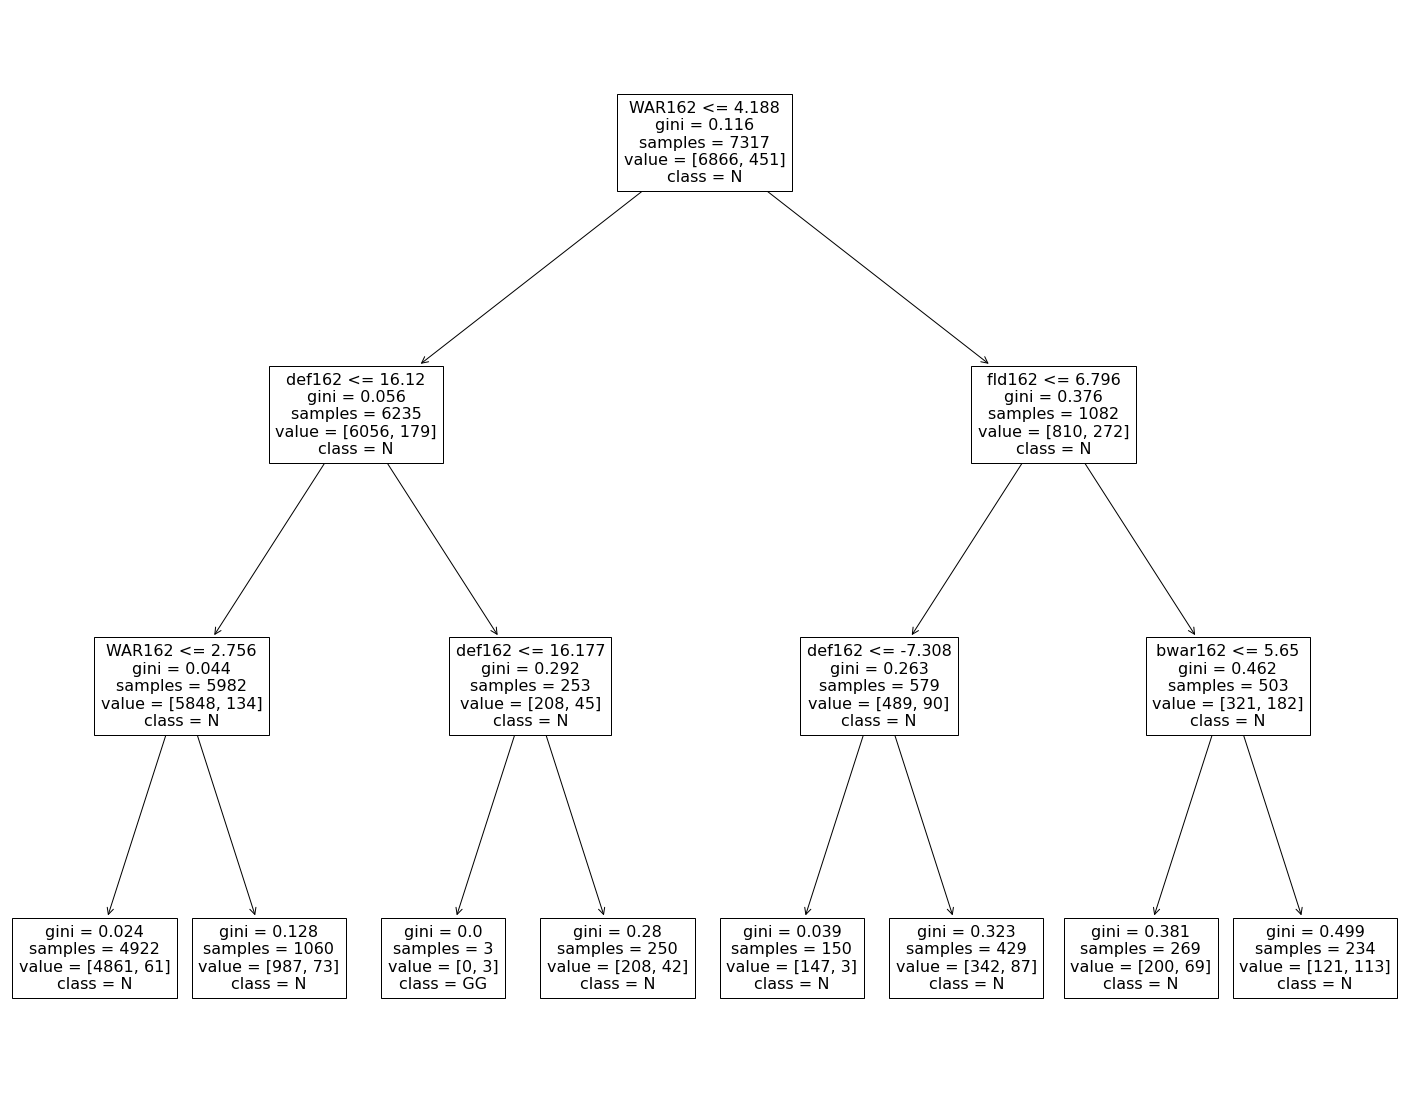

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
batter = batter.drop(['gms_P', 'gms_C', 'gms_1B', 'gms_2B', 'gms_3B', 'gms_SS', 'gms_LF', 'gms_CF', 'gms_RF', 'gms_OF', 'gms_DH', 'gms_PH', 'gms_PR'], axis = 1)
X = batter.drop('GG', axis = 1)
X = X.dropna()
Y = batter.dropna()['GG']
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.3, shuffle = False)
xrtrain, xrtest, yrtrain, yrtest = train_test_split(xtrain, ytrain, test_size=2/7, shuffle = False)
clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
clf1 = clf.fit(xrtrain,yrtrain)
print("Score: ",clf1.score(xrtest,yrtest))
print("Recall Score: ",recall_score(yrtest,clf1.predict(xrtest)))
print("Precision Score: ",precision_score(yrtest,clf1.predict(xrtest)))
print("F1 Score: ",f1_score(yrtest,clf1.predict(xrtest)))
print("Score: ",clf1.score(xtest,ytest))
print("Recall Score: ",recall_score(ytest,clf1.predict(xtest)))
print("Precision Score: ",precision_score(ytest,clf1.predict(xtest)))
print("F1 Score: ",f1_score(ytest,clf1.predict(xtest)))
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names = X.columns, class_names=['N', 'GG'])

Score:  0.9799357945425361
Recall Score:  0.0
Precision Score:  0.0
F1 Score:  0.0
Score:  0.9775280898876404
Recall Score:  0.0
Precision Score:  0.0
F1 Score:  0.0


[Text(0.5, 0.875, 'CG <= 18.5\ngini = 0.037\nsamples = 3113\nvalue = [3054, 59]\nclass = N'),
 Text(0.25, 0.625, 'age <= 33.5\ngini = 0.027\nsamples = 2982\nvalue = [2941, 41]\nclass = N'),
 Text(0.125, 0.375, 'br_pwar162 <= 9.591\ngini = 0.018\nsamples = 2672\nvalue = [2648, 24]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.017\nsamples = 2669\nvalue = [2646, 23]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.375, 0.375, 'BAOpp <= 0.3\ngini = 0.104\nsamples = 310\nvalue = [293, 17]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.098\nsamples = 309\nvalue = [293, 16]\nclass = N'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = GG'),
 Text(0.75, 0.625, 'bwar162 <= 0.192\ngini = 0.237\nsamples = 131\nvalue = [113, 18]\nclass = N'),
 Text(0.625, 0.375, 'BK <= 3.5\ngini = 0.103\nsamples = 92\nvalue = [87, 5]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.084\nsamples = 91\nvalue = [87, 4]\nclass = N'),
 Text(0.6875, 0.1

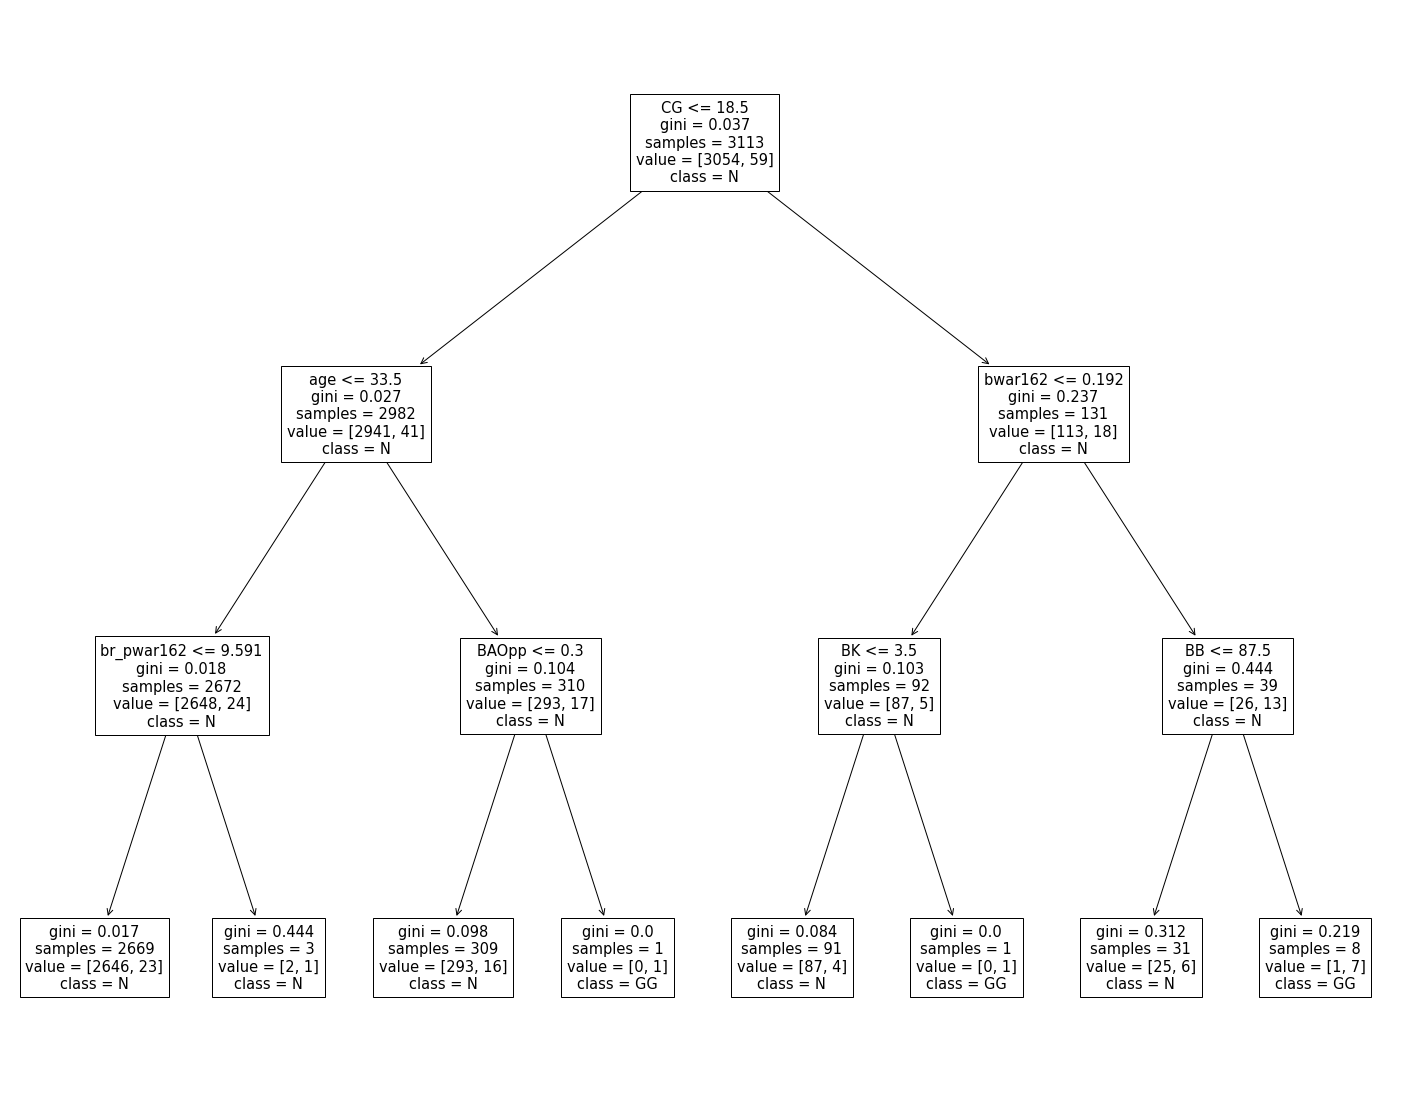

In [ ]:
pitcher = pitcher.drop(['gms_P', 'gms_C', 'gms_1B', 'gms_2B', 'gms_3B', 'gms_SS', 'gms_LF', 'gms_CF', 'gms_RF', 'gms_OF', 'gms_DH', 'gms_PH', 'gms_PR'], axis = 1)
X = pitcher.drop('GG', axis = 1)
X = X.dropna()
Y = pitcher.dropna()['GG']
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.3, shuffle = False)
xrtrain, xrtest, yrtrain, yrtest = train_test_split(xtrain, ytrain, test_size=2/7, shuffle = False)
clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
clf1 = clf.fit(xrtrain,yrtrain)
print("Score: ",clf1.score(xrtest,yrtest))
print("Recall Score: ",recall_score(yrtest,clf1.predict(xrtest)))
print("Precision Score: ",precision_score(yrtest,clf1.predict(xrtest)))
print("F1 Score: ",f1_score(yrtest,clf1.predict(xrtest)))
print("Score: ",clf1.score(xtest,ytest))
print("Recall Score: ",recall_score(ytest,clf1.predict(xtest)))
print("Precision Score: ",precision_score(ytest,clf1.predict(xtest)))
print("F1 Score: ",f1_score(ytest,clf1.predict(xtest)))
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names = X.columns, class_names=['N', 'GG'])